# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")




Number of cities in the list: 595


In [4]:
city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -176.5597, 'lat': -43.9535},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 47.82,
  'feels_like': 47.82,
  'temp_min': 47.82,
  'temp_max': 47.82,
  'pressure': 1029,
  'humidity': 93},
 'visibility': 10000,
 'wind': {'speed': 1.43, 'deg': 58, 'gust': 2.19},
 'clouds': {'all': 6},
 'dt': 1698602473,
 'sys': {'type': 2,
  'id': 2040615,
  'country': 'NZ',
  'sunrise': 1698683397,
  'sunset': 1698733779},
 'timezone': 49500,
 'id': 4032804,
 'name': 'Waitangi',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# List of city data
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the City information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")





Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jayapura
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | murun-kuren
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | talavera de la reina
Processing Record 7 of Set 1 | adiake
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | malango
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | yuzhno-kurilsk
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | trumann
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | kenora
Processing Record 20 of Set 1 | andilamena
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | mao
Processing Record 23 of Set 1 |

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jayapura,-2.5333,140.7000,78.19,92,68,5.44,ID,2023-10-29 18:01:14
1,Bilibino,68.0546,166.4372,-9.42,93,18,4.94,RU,2023-10-29 18:01:09
2,Murun-Kuren,49.6342,100.1625,30.72,36,94,2.91,MN,2023-10-29 18:01:14
3,Tiksi,71.6872,128.8694,9.14,95,100,5.39,RU,2023-10-29 18:01:15
4,Grytviken,-54.2811,-36.5092,38.07,91,74,5.77,GS,2023-10-29 18:01:15


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Jayapura,-2.5333,140.7000,78.19,92,68,5.44,ID,2023-10-29 18:01:14
1,Bilibino,68.0546,166.4372,-9.42,93,18,4.94,RU,2023-10-29 18:01:09
2,Murun-Kuren,49.6342,100.1625,30.72,36,94,2.91,MN,2023-10-29 18:01:14
3,Tiksi,71.6872,128.8694,9.14,95,100,5.39,RU,2023-10-29 18:01:15
4,Grytviken,-54.2811,-36.5092,38.07,91,74,5.77,GS,2023-10-29 18:01:15


In [10]:
northern_hemisphere = city_data_df.loc[city_data_df['Lat'] > 0]
southern_hemisphere = city_data_df.loc[city_data_df['Lat'] < 0]

#### Latitude Vs. Temperature (Northern Hemisphere)

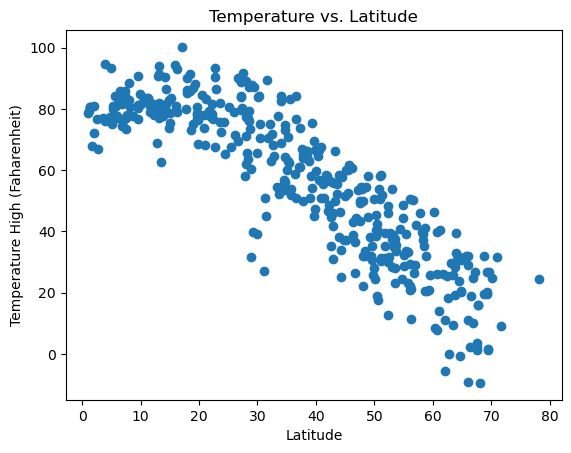

In [11]:

x_axis = northern_hemisphere['Lat']
y_axis = northern_hemisphere['Max Temp']

plt.scatter(x_axis,y_axis)
plt.ylabel('Temperature High (Faharenheit)')
plt.xlabel('Latitude')
plt.title('Temperature vs. Latitude')

plt.savefig('../python-API-challenge/output_data/Fig1.png')

plt.show()

#### Latitude Vs. Humidity (Northern Hemisphere)

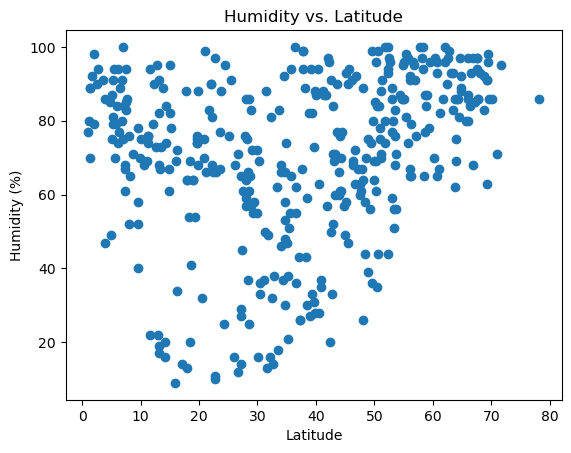

In [12]:

x_axis = northern_hemisphere['Lat']
y_axis = northern_hemisphere['Humidity']

plt.scatter(x_axis,y_axis)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Humidity vs. Latitude')

plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness (Northern Hemisphere)

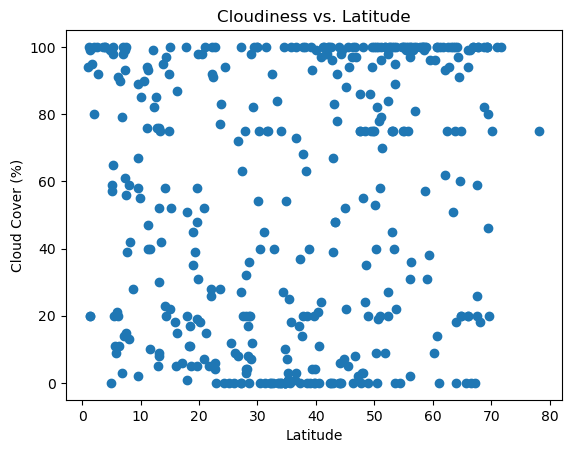

In [13]:
x_axis = northern_hemisphere['Lat']
y_axis = northern_hemisphere['Cloudiness']

plt.scatter(x_axis,y_axis)
plt.ylabel('Cloud Cover (%)')
plt.xlabel('Latitude')
plt.title('Cloudiness vs. Latitude')

plt.savefig("output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot (Northern Hemisphere)

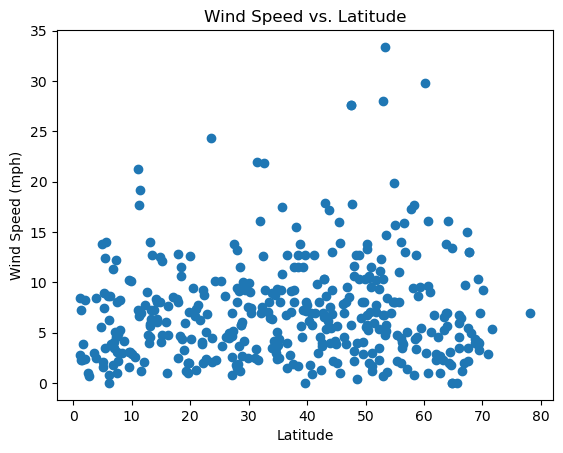

In [14]:
x_axis = northern_hemisphere['Lat']
y_axis = northern_hemisphere['Wind Speed']

plt.scatter(x_axis,y_axis)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Wind Speed vs. Latitude')

plt.savefig("output_data/Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(northern_hemisphere)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Bilibino,68.0546,166.4372,-9.42,93,18,4.94,RU,2023-10-29 18:01:09
2,Murun-Kuren,49.6342,100.1625,30.72,36,94,2.91,MN,2023-10-29 18:01:14
3,Tiksi,71.6872,128.8694,9.14,95,100,5.39,RU,2023-10-29 18:01:15
5,Talavera De La Reina,39.9635,-4.8308,59.77,87,99,7.78,ES,2023-10-29 18:01:15
6,Adiake,5.2863,-3.3040,80.08,81,65,7.40,CI,2023-10-29 18:01:16


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(southern_hemisphere)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Jayapura,-2.5333,140.7000,78.19,92,68,5.44,ID,2023-10-29 18:01:14
4,Grytviken,-54.2811,-36.5092,38.07,91,74,5.77,GS,2023-10-29 18:01:15
7,Adamstown,-25.0660,-130.1015,72.09,84,100,16.64,PN,2023-10-29 18:01:16
8,Malango,-2.9627,119.9001,64.99,91,96,2.30,ID,2023-10-29 18:01:16
11,West Island,-12.1568,96.8225,78.78,83,100,17.27,CC,2023-10-29 18:01:17


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7670051557697871


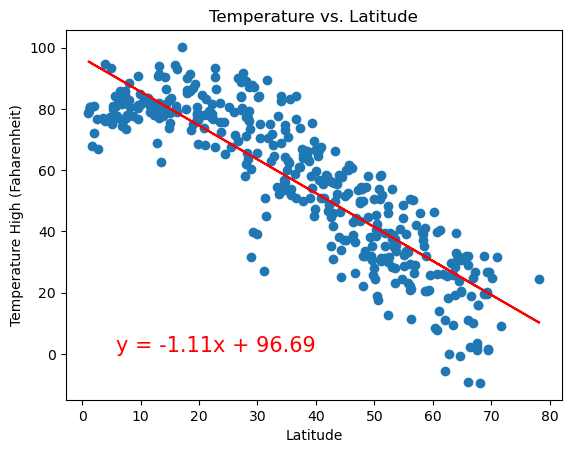

In [17]:

x_axis = northern_hemisphere['Lat']
y_axis = northern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.ylabel('Temperature High (Faharenheit)')
plt.xlabel('Latitude')
plt.title('Temperature vs. Latitude')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../python-API-challenge/output_data/Fig1.png')

plt.show()


The r-squared is: 0.5884003494465948


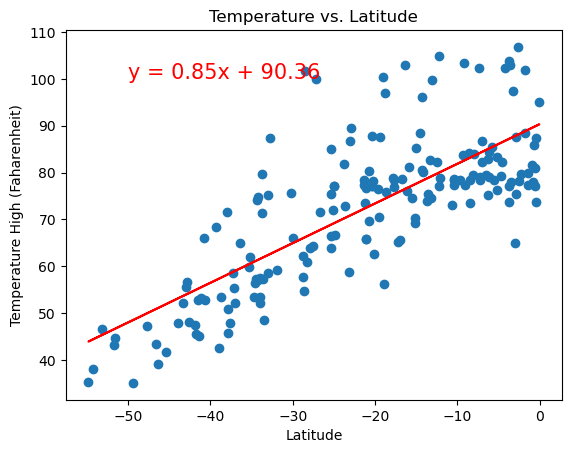

In [18]:
x_axis = southern_hemisphere['Lat']
y_axis = southern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.ylabel('Temperature High (Faharenheit)')
plt.xlabel('Latitude')
plt.title('Temperature vs. Latitude')
plt.annotate(line_eq,(-50,100),fontsize=15,color='red')
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../python-API-challenge/output_data/Fig1.png')

plt.show()


**Discussion about the linear relationship:** There is an all but perfect linear relationship between temperature and latitude

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05172354067440769


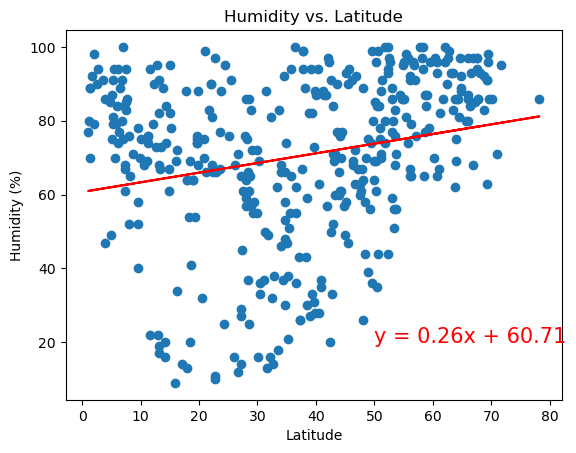

In [19]:
x_axis = northern_hemisphere['Lat']
y_axis = northern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Humidity vs. Latitude')
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../python-API-challenge/output_data/Fig1.png')

plt.show()

The r-squared is: 2.062743017456154e-05


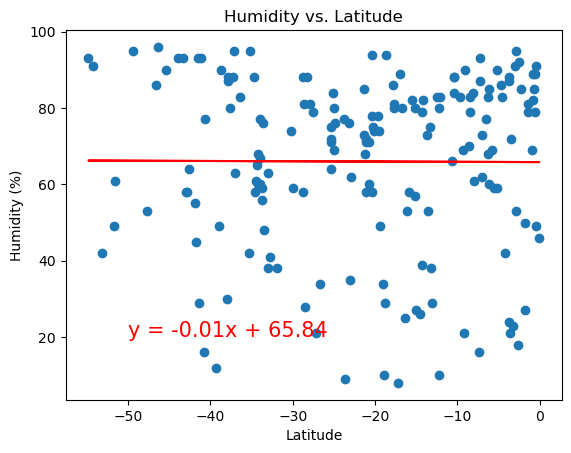

In [20]:
x_axis = southern_hemisphere['Lat']
y_axis = southern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Humidity vs. Latitude')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../python-API-challenge/output_data/Fig1.png')

plt.show()

**Discussion about the linear relationship:** Proximity to the equator can be an indicator of humidity but it isn't a strong one.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.022926387979657764


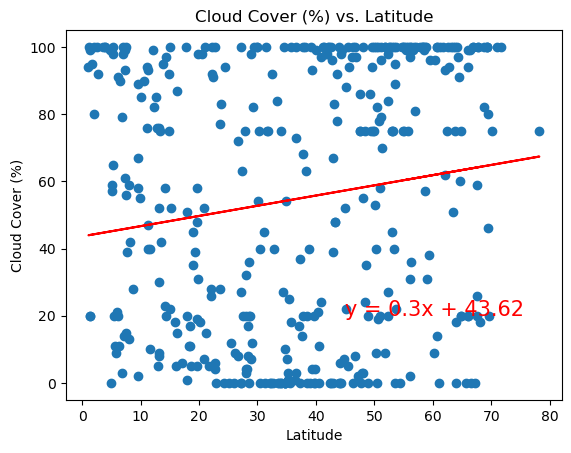

In [21]:
x_axis = northern_hemisphere['Lat']
y_axis = northern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.ylabel('Cloud Cover (%)')
plt.xlabel('Latitude')
plt.title('Cloud Cover (%) vs. Latitude')
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../python-API-challenge/output_data/Fig1.png')

plt.show()

The r-squared is: 9.998491270342691e-05


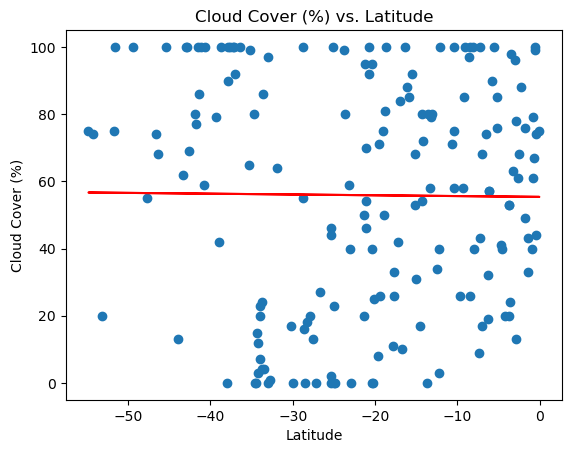

In [22]:
x_axis = southern_hemisphere['Lat']
y_axis = southern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.ylabel('Cloud Cover (%)')
plt.xlabel('Latitude')
plt.title('Cloud Cover (%) vs. Latitude')
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../python-API-challenge/output_data/Fig1.png')

plt.show()

**Discussion about the linear relationship:** There is little to no relationship between cloud cover and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0077264308705100124


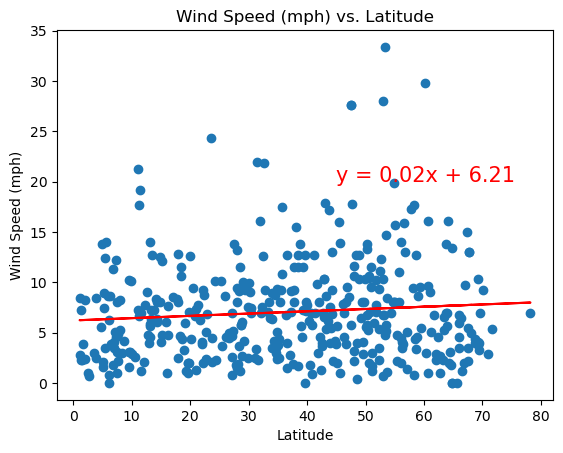

In [23]:
x_axis = northern_hemisphere['Lat']
y_axis = northern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Wind Speed (mph) vs. Latitude')
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../python-API-challenge/output_data/Fig1.png')

plt.show()

The r-squared is: 0.1045532961944704


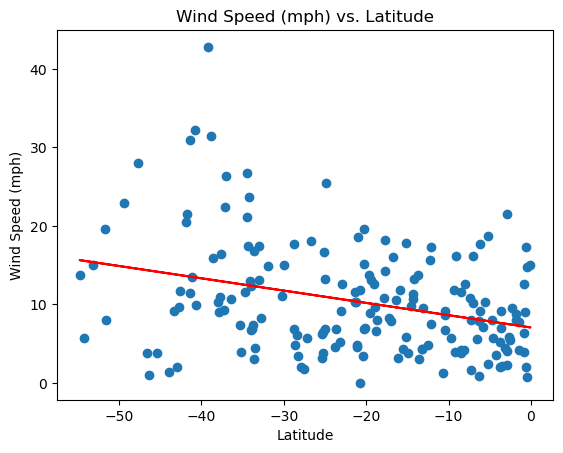

In [24]:
x_axis = southern_hemisphere['Lat']
y_axis = southern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Wind Speed (mph) vs. Latitude')
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../python-API-challenge/output_data/Fig1.png')

plt.show()

**Discussion about the linear relationship:** Latitude does not bare any insight to wind speeds, perhaps elevation would?